In [2]:
!pip install -r ../requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 88.9 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 87.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 97.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.0/95.0 kB 1.4 MB/s eta 0:00:00ta 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 503.5/503.5 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 52.2 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 944.1/944.1 kB 25.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 27.9 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 89.8 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.7/233.7 kB 7.4 MB/s eta 0:00:00
     ━━━

In [11]:
!pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)

[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip


**Step 1:**

Install and import libraries

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import folium
from sklearn.metrics.pairwise import cosine_similarity
import pickle
from sklearn.preprocessing import StandardScaler
from scipy.cluster.vq import kmeans, vq
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [61]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
df_raw = pd.read_csv(url)

**Step 2:**

Load the housing dataset and take a look at the first rows. Then create a new dataframe with only the 'latitude','longitude' and 'medincome' column to create our clusters.

In [48]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [49]:
df_raw.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [62]:
df = df_raw[['Latitude','Longitude','MedInc']]

In [63]:
df

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


In [52]:
df.describe()

,Latitude,Longitude,MedInc
count,20640.000000,20640.000000,20640.000000
mean,35.631861,-119.569704,3.870671
std,2.135952,2.003532,1.899822
min,32.540000,-124.350000,0.499900
25%,33.930000,-121.800000,2.563400
50%,34.260000,-118.490000,3.534800
75%,37.710000,-118.010000,4.743250
max,41.950000,-114.310000,15.000100


In [64]:
scaler = StandardScaler()
df_norm = scaler.fit_transform(df)
df_norm

#Note: In Machine Learning, StandardScaler is used to resize the distribution 
#of values ​​so that the mean of the observed values ​​is 0 and the standard deviation is 1

array([[ 1.05254828, -1.32783522,  2.34476576],
       [ 1.04318455, -1.32284391,  2.33223796],
       [ 1.03850269, -1.33282653,  1.7826994 ],
       ...,
       [ 1.77823747, -0.8237132 , -1.14259331],
       [ 1.77823747, -0.87362627, -1.05458292],
       [ 1.75014627, -0.83369581, -0.78012947]])

In [24]:
#df_describe = pd.DataFrame(df_norm)
#df_describe.describe()
#Hice esto solo para ver si cambiaron las medias y desviaciones estándar

* Elbow method:

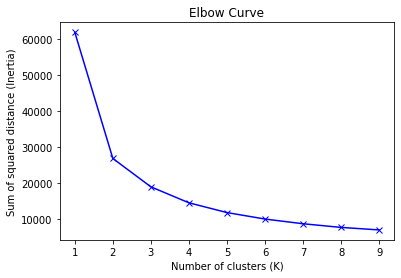

In [65]:
sum_distancias_cuadradas = []
# Inertia measures how well a dataset was clustered by K-Means. 
# It is calculated by measuring the distance between each data point and its centroid, squaring this distance, 
# and summing these squares across one cluster. 
# A good model is one with low inertia AND a low number of clusters (K).


K = range(1,10)

for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_norm)
    sum_distancias_cuadradas.append(kmeans.inertia_)
plt.plot(K,sum_distancias_cuadradas,'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of squared distance (Inertia)')
plt.title('Elbow Curve')
plt.show()

# The optimum clusters is where the elbow occurs (K = 2).

* **Silhouette analysis**:
</br> The silhouette coefficient is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation). 

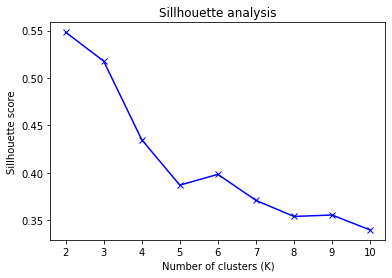

In [66]:
rango_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10]
silhouette_avg = []

for num_clusters in rango_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_norm)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(df_norm, cluster_labels))
plt.plot(rango_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sillhouette score')
plt.title('Sillhouette analysis')
plt.show()

#Highest score is 2.

Now that we have the optimum amount of clusters (k=2), we can move on to applying K-means clustering to the dataset.

In [67]:
model = KMeans(n_clusters = 2)
model.fit(df_norm)

KMeans(n_clusters=2)

In [68]:
df2 = scaler.inverse_transform(df_norm)
#To scale back the data to the original representation

In [75]:
df2=pd.DataFrame(df2,columns=['Latitude','Longitude','MedInc', 'Cluster'])

ValueError: Shape of passed values is (20640, 3), indices imply (20640, 4)

In [59]:
df2['Cluster'] = model.labels_

In [60]:
df2

,MedInc,Latitude,Longitude,Cluster
0,37.88,-122.23,8.3252,1
1,37.86,-122.22,8.3014,1
2,37.85,-122.24,7.2574,1
3,37.85,-122.25,5.6431,1
4,37.85,-122.25,3.8462,1
...,...,...,...,...
20635,39.48,-121.09,1.5603,1
20636,39.49,-121.21,2.5568,1
20637,39.43,-121.22,1.7000,1
20638,39.43,-121.32,1.8672,1


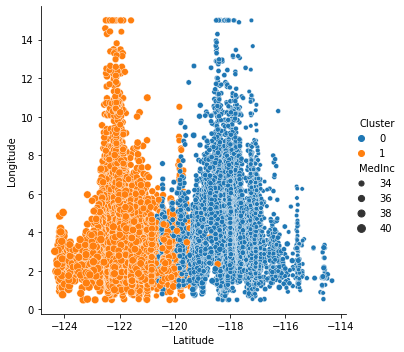

In [44]:
sns.relplot(x='Latitude', y='Longitude', data=df2, kind='scatter', size = 'MedInc',hue='Cluster')